In [159]:
import pandas as pd
from google.colab import drive

from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score,f1_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
df = pd.read_csv('/content/drive/MyDrive/Fraud.csv')

In [142]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [143]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3156363,237,PAYMENT,6395.74,C205159334,33256.89,26861.15,M119550385,0.00,0.00,0,0
4350524,309,TRANSFER,295865.70,C755956143,506572.00,210706.30,C1180747828,326240.49,622106.19,0,0
1812472,163,CASH_OUT,163827.21,C1297717280,19096.00,0.00,C735909491,9471130.89,9634958.10,0,0
3211778,249,CASH_OUT,205375.90,C668938383,30132.33,0.00,C255251588,283187.46,488563.35,0,0
391437,17,PAYMENT,5234.70,C1618623017,403128.40,397893.70,M381938134,0.00,0.00,0,0


Let's first preprocess the data.
We will remove duplicates if these 6 fields match.

In [144]:
#Removing Duplicates
df=df[-df.duplicated(["nameOrig","oldbalanceOrg","newbalanceOrig","nameDest","oldbalanceDest","newbalanceDest"])]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


We didn't get any duplicates.
Now lets see for some missing entries.

In [145]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


Our data is robust. No empty entries.There are no logical outliers in the data.
Now let's setup some benchmarks based on the performance of the previous model.
We will do that by setting up a confusion matrix and calculating standard performance metrics.

In [146]:
old_flags=df['isFlaggedFraud']
true_flags=df['isFraud']
old_cm=confusion_matrix(old_flags,true_flags)
print(f"old confusion matrix {old_cm}")
print("-----old performance metrics are as follows-----")
print(f"old precision {precision_score(old_flags,true_flags)}")
print(f"old recall {recall_score(old_flags,true_flags)}")
print(f"old accuracy {accuracy_score(old_flags,true_flags)}")
print(f"old f1 score {f1_score(old_flags,true_flags)}")

old confusion matrix [[6354407    8197]
 [      0      16]]
-----old performance metrics are as follows-----
old precision 0.0019481310118105442
old recall 1.0
old accuracy 0.9987116942391656
old f1 score 0.0038886863531413293


Current model is way too lenient. Of the 8213 fraudsters it caught only 16.
Okay so now we have got our benchmarks to beat.
Let's see how good we can do.
First let's drop the IsFlaggedFraud column

In [147]:
df=df.drop(columns=['isFlaggedFraud'])
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
3223685,250,CASH_IN,202466.59,C814052694,6091348.70,6293815.30,C796326559,2664873.45,2462406.86,0
1159710,131,CASH_IN,146296.93,C334623671,3116420.42,3262717.36,C703414770,598878.45,452581.52,0
3090019,235,CASH_IN,166646.53,C553608071,348115.03,514761.56,C2124100345,3449754.87,3283108.34,0
4909385,349,CASH_IN,105158.98,C1427521579,14613701.60,14718860.58,C455436884,9581037.86,9824304.35,0
86784,10,PAYMENT,3191.85,C2092474000,0.00,0.00,M1745356777,0.00,0.00,0


Let's start modelling.

We will employ two techniques logical data analysis based on hypotheticals and supervised learning.

Starting with the first method.
Let's first do exploratory analysis to develop our strategy.Few behaviours of a fraudster can be exploited-
1. After a huge 'Cash Out' balance would go to 0 or it would hit a withdrawl limit.
2. Fraudsters will use transfer or cash out options usually.


Let's check these 2 using visualization tools.


/tmp/ipython-input-215754145.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df[df['isFraud'] == 1], palette='viridis')


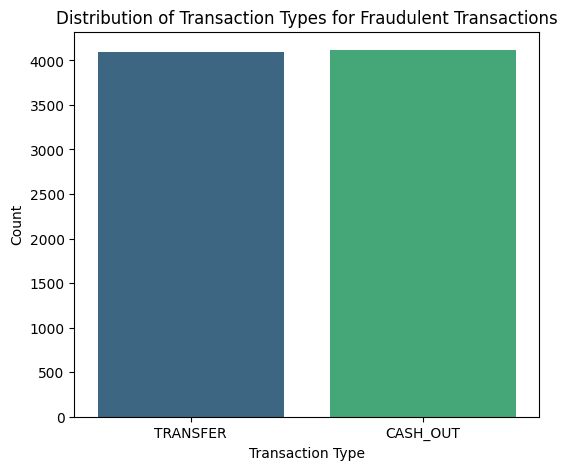

In [148]:
#2nd hypothesis
plt.figure(figsize=(6, 5))
sns.countplot(x='type', data=df[df['isFraud'] == 1], palette='viridis')
plt.title('Distribution of Transaction Types for Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

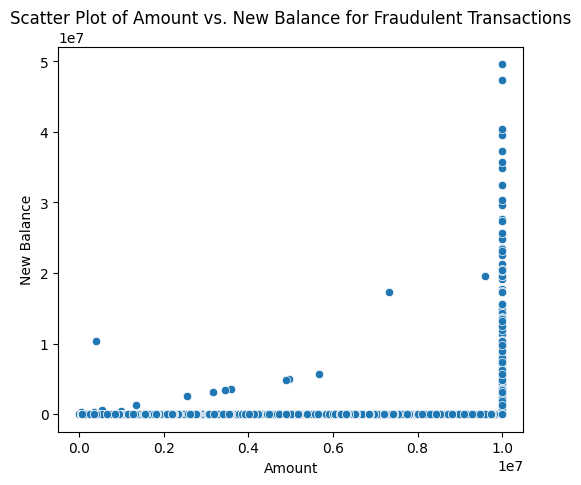

In [149]:
#1st hypothesis
plt.figure(figsize=(6, 5))
sns.scatterplot(x='amount', y='newbalanceOrig',data=df[df['isFraud'] == 1])
plt.title('Scatter Plot of Amount vs. New Balance for Fraudulent Transactions')
plt.xlabel('Amount')
plt.ylabel('New Balance')
plt.show()

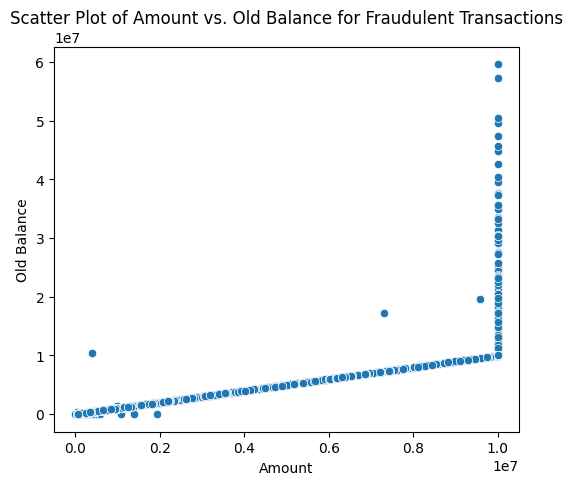

In [150]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x='amount', y='oldbalanceOrg',data=df[df['isFraud'] == 1])
plt.title('Scatter Plot of Amount vs. Old Balance for Fraudulent Transactions')
plt.xlabel('Amount')
plt.ylabel('Old Balance')
plt.show()

From these graphs it's very clear that the withdrawal limit is 10^7 as fraudsters are unable to extract more than that even if it's present. So the rules are quite transparent here.

1. Only two kinds of type-'CASH_OUT' and 'TRANSFER'
2. Fraudsters will take everything in the account below <= 10^7 or hit the upper withdrawl limit of 10^7.
3. Fraudsters know exactly the amount in the account.

Let's filter the data according to these simple rules and check our findings.

In [151]:
condition_type_check=(df['type']=='CASH_OUT')|(df['type']=='TRANSFER')
condition_balance_check=((df['oldbalanceOrg']<=10000000)&(df['oldbalanceOrg']==df['amount']))|((df['oldbalanceOrg']>10^7)&(df['amount']==10^7))
fraud_mask=(condition_balance_check)&(condition_type_check)
df['New_Fraud_Flag']=fraud_mask

Now that are new pridictions are ready let's backtest our strategy against previous benchmarks.

In [152]:
new_flags=df['New_Fraud_Flag']
true_flags=df['isFraud']
new_cm=confusion_matrix(new_flags,true_flags)
print(f"new confusion matrix {new_cm}")
print("-----new performance metrics are as follows-----")
print(f"new precision {precision_score(new_flags,true_flags)}")
print(f"new recall {recall_score(new_flags,true_flags)}")
print(f"new accuracy {accuracy_score(new_flags,true_flags)}")
print(f"new f1 score {f1_score(new_flags,true_flags)}")

new confusion matrix [[6354407     179]
 [      0    8034]]
-----new performance metrics are as follows-----
new precision 0.9782052843053696
new recall 1.0
new accuracy 0.9999718669353191
new f1 score 0.988982581399643


Congrats!! We performed better on all our metrics. Number of fraudsters went to 179 from 8197.

Can we do better though?

Let's try combining our approach with supervised learning algorithms.

Logistic Regression would be perfect for this task.

Since we already know a lot of things about the data. Let's compliment our model with that information, making it learn faster.

Let's first make our data consumable.

In [153]:
#One-Hot Encoding of type
df=pd.get_dummies(df,columns=['type'])
trainable_df=df.drop(columns=['nameOrig','nameDest','step','New_Fraud_Flag','isFraud'])
trainable_df.sample(5)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
5716457,16758.03,0.00,0.00,0.00,0.00,False,False,False,True,False
4577721,292936.99,1947251.96,2240188.95,4461605.33,4168668.35,True,False,False,False,False
1518244,1658.97,11372.00,9713.03,0.00,0.00,False,False,False,True,False
5369282,11392.19,11630.00,237.81,0.00,0.00,False,False,False,True,False
4133915,103707.73,6549702.86,6653410.58,459580.58,355872.85,True,False,False,False,False


In [172]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

seed=1729

X = trainable_df.drop(columns=['oldbalanceDest','newbalanceDest'])
y = df['isFraud']

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train_scaled,X_test_scaled,y_train,y_test=train_test_split(X_scaled,y,test_size=0.1,stratify=y,random_state=seed)

model=LogisticRegression(class_weight='balanced',random_state=seed,max_iter=1000)
model.fit(X_train_scaled,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=1729)

Ok now that we have our model trained let's see if it does any better.

In [173]:
model_fraud_flag=model.predict(X_test_scaled)
true_flags=y_test

from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score,f1_score

new_cm=confusion_matrix(true_flags,model_fraud_flag)
print(f"new confusion matrix {new_cm}")
print("-----new performance metrics are as follows-----")
print(f"new precision {precision_score(true_flags,model_fraud_flag)}")
print(f"new recall {recall_score(true_flags,model_fraud_flag)}")
print(f"new accuracy {accuracy_score(true_flags,model_fraud_flag)}")
print(f"new f1 score {f1_score(true_flags,model_fraud_flag)}")

new confusion matrix [[598763  36678]
 [    52    769]]
-----new performance metrics are as follows-----
new precision 0.020535690442492056
new recall 0.9366626065773447
new accuracy 0.9422722086184622
new f1 score 0.04019023727396258


So our previous results were better in this case.
The fraudsters are using working with predictable tendencies which can be easily tracked but once we deploy our approach they are bound to look for more subtle ways where we may be Logistic Regression would perform better.
A cool anology of this phenomena is benford's law.
People have been able to detect fraud using this simple and easy to understand mathematical logic where huge computers failed.


Concluding I would like to reiterate methods to reduce frauds based on this dataset.
1. Customers use their account more than once,fraudsters do not.
2. Fraudsters withdraw the exact bank balance at once, customers do not.
3. Fraudsters always 'Cash_out' or 'Transfer' the money.


Thank you!